In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [ ]:
import pandas as pd
from pandas_datareader import data
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
start = datetime.strptime('2004-01-02','%Y-%m-%d')
end = datetime.strptime('2009-6-30','%Y-%m-%d')

df = data.DataReader('^HSI',start=start, end=end, data_source='yahoo')
df = df[:1500]['Close']

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
training_size=int(len(data)*0.65)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:]

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print(X_train)
print(y_train)

[[0.08871696 0.09857878 0.10007803 ... 0.11447964 0.11232006 0.09831998]
 [0.09857878 0.10007803 0.10594915 ... 0.11232006 0.09831998 0.10267541]
 [0.10007803 0.10594915 0.10817019 ... 0.09831998 0.10267541 0.10251677]
 ...
 [0.51846753 0.53152958 0.53371821 ... 0.5798722  0.58487261 0.57445292]
 [0.53152958 0.53371821 0.52512819 ... 0.58487261 0.57445292 0.5828842 ]
 [0.53371821 0.52512819 0.52421969 ... 0.57445292 0.5828842  0.59622206]]
[0.10267541 0.10251677 0.09981776 0.11329872 0.12621951 0.12326751
 0.12370773 0.12856343 0.13411093 0.13854866 0.13777027 0.14323405
 0.14027525 0.1403309  0.13533347 0.13491451 0.12732205 0.13095861
 0.1422012  0.14276336 0.13370213 0.12028887 0.12016646 0.12032128
 0.12606762 0.11753907 0.10868349 0.09948488 0.09504237 0.09442215
 0.09506122 0.0971463  0.08942859 0.08818962 0.07659488 0.07840664
 0.08274951 0.07510966 0.07332114 0.0706168  0.08097209 0.08292077
 0.08265856 0.08534401 0.09285275 0.0944531  0.09393644 0.09985981
 0.08234944 0.073128

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential() 
model.add(LSTM(200,return_sequences=True,input_shape=(20,1))) 
model.add(LSTM(200,return_sequences=True)) 
model.add(LSTM(200)) 
model.add(Dense(1)) 
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
27/27 [==============================] - 26s 443ms/step - loss: 0.0079 - val_loss: 0.0285
Epoch 2/200
27/27 [==============================] - 6s 207ms/step - loss: 0.0019 - val_loss: 0.0059
Epoch 3/200
27/27 [==============================] - 6s 205ms/step - loss: 0.0012 - val_loss: 0.0047
Epoch 4/200
27/27 [==============================] - 6s 207ms/step - loss: 0.0014 - val_loss: 0.0206
Epoch 5/200
27/27 [==============================] - 6s 208ms/step - loss: 9.9698e-04 - val_loss: 0.0048
Epoch 6/200
27/27 [==============================] - 6s 212ms/step - loss: 5.2114e-04 - val_loss: 0.0047
Epoch 7/200
27/27 [==============================] - 6s 208ms/step - loss: 5.7410e-04 - val_loss: 0.0047
Epoch 8/200
27/27 [==============================] - 6s 205ms/step - loss: 9.6297e-04 - val_loss: 0.0035
Epoch 9/200
27/27 [==============================] - 6s 205ms/step - loss: 6.6459e-04 - val_loss: 0.0069
Epoch 10/200
27/27 [==============================] - 6s 208ms/step - 

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

<function matplotlib.pyplot.show>

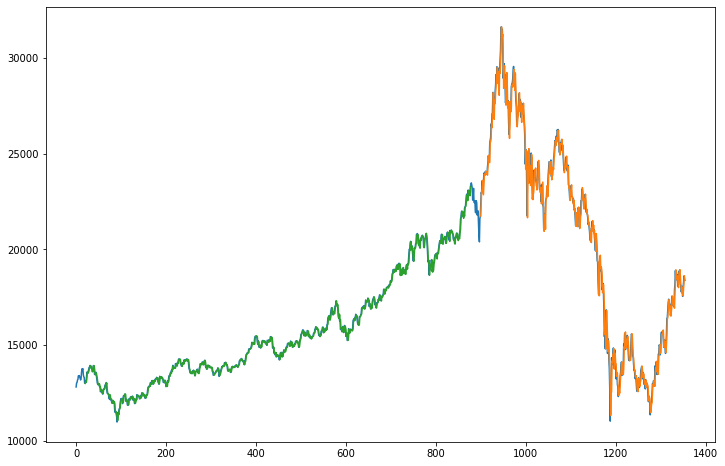

In [ ]:
look_back=20
trainPredictPlot=np.empty_like(data)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

testPredictPlot=np.empty_like(data)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1,:] = test_predict

plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(data))
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)

plt.show

<function matplotlib.pyplot.show>

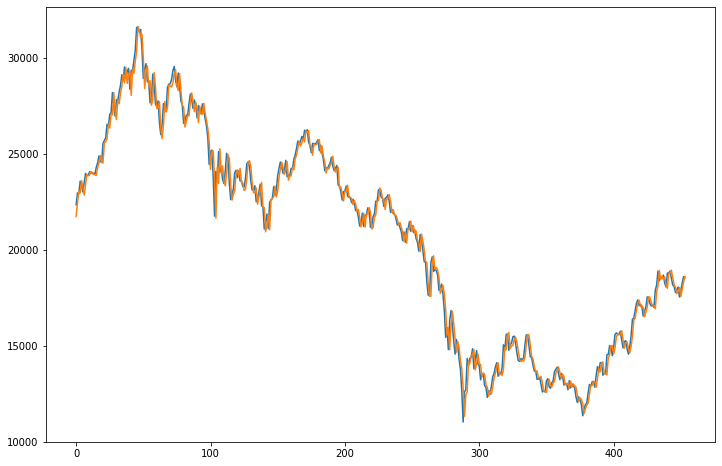

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(data)[len(train_predict)+(look_back*2)+1:len(data)-1])
plt.plot(test_predict)
plt.show